In [1]:
import os
import sys

import matplotlib.pyplot as plt
import matplotlib.patches as patches

sys.path.append("..")  # Adds higher directory to python modules path.
from src import RASPRoutines
import polars as pl
import numpy as np
from src import IOFunctions
from src import AnalysisFunctions
from src import Image_Analysis_Functions
from src import HelperFunctions

RASP = RASPRoutines.RASP_Routines()
IO = IOFunctions.IO_Functions()
A_F = AnalysisFunctions.Analysis_Functions()
IA_F = Image_Analysis_Functions.ImageAnalysis_Functions()
H_F = HelperFunctions.Helper_Functions()

from src import PlottingFunctions
plots = PlottingFunctions.Plotter()

import warnings
from copy import copy

warnings.filterwarnings("ignore")

In [2]:
folder = '/home/jbeckwith/temp_data/PD_patient1/'
raw_cell_MIP = IO.read_tiff(os.path.join(folder, 'cell_bigimage.tiff'))
raw_asyn_MIP = IO.read_tiff(os.path.join(folder, 'asyn_bigimage.tiff'))

In [3]:
cell_MIP_fast = copy(raw_cell_MIP/np.max(raw_cell_MIP) * 255).astype(np.uint8)
asyn_MIP_fast = copy(raw_asyn_MIP/np.max(raw_asyn_MIP) * 255).astype(np.uint8)

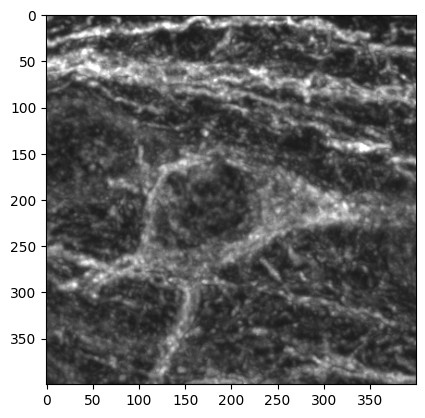

In [4]:
fovsize = 1200
fovx = 0
fovy = 20

xmin = fovsize*fovx
xmax = xmin + fovsize
ymin = fovsize*fovy
ymax = ymin + fovsize

plt.imshow(cell_MIP_fast[xmin+800:xmax, ymin+500:ymax-300], vmin=0, vmax=150, cmap='gist_gray')

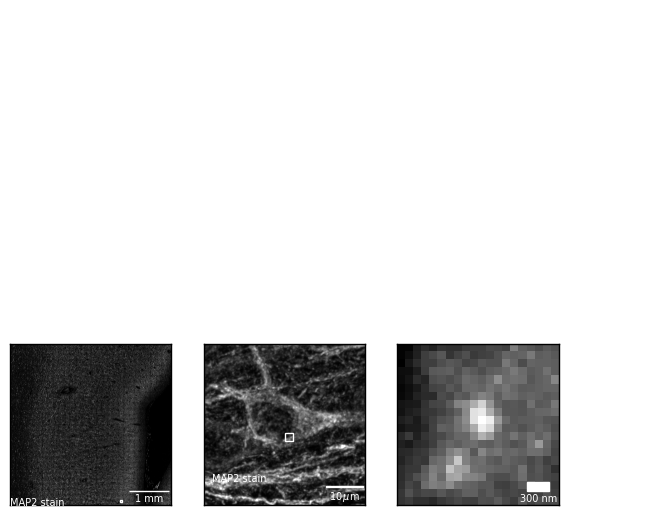

In [5]:
# PD patient plot
fig, axs = plots.two_column_plot(ncolumns=3, widthratio=[1,1,1])

fovsize = 1200
fovx = 0
fovy = 20

xmin = fovsize*fovx
xmax = xmin + fovsize
ymin = fovsize*fovy
ymax = ymin + fovsize

axs[0] = plots.image_plot(axs[0], raw_cell_MIP, scalebarsize=1000*1000, scalebarlabel='1 mm', cbar='off', label='MAP2 stain')

neuron_xmin = 800
neuron_xmax = 0
neuron_ymin = 500
neuron_ymax = 300

# Create a Rectangle patch
xsize, ysize = cell_MIP_fast[xmin+neuron_xmin:xmax-neuron_xmax, ymin+neuron_ymin:ymax-neuron_ymax].shape
recty = (ymin+neuron_ymin)
rectx = (xmin+neuron_xmin)
rect = patches.Rectangle((recty, rectx), xsize, ysize, linewidth=1, edgecolor='white', facecolor='none')

# Add the patch to the Axes
axs[0].add_patch(rect)

axs[1] = plots.image_plot(axs[1], raw_cell_MIP[xmin+neuron_xmin:xmax-neuron_xmax, ymin+neuron_ymin:ymax-neuron_ymax], cbar='off', label='MAP2 stain')

oligomer_xmin = 958
oligomer_xmax = 222
oligomer_ymin = 702
oligomer_ymax = 478


axs[2] = plots.image_plot(axs[2], raw_asyn_MIP[xmin+oligomer_xmin:xmax-oligomer_xmax, ymin+oligomer_ymin:ymax-oligomer_ymax], cbar='off', scalebarlabel='300 nm', scalebarsize=300, label='pS129 asyn stain')

xsize, ysize = asyn_MIP_fast[xmin+oligomer_xmin:xmax-oligomer_xmax, ymin+oligomer_ymin:ymax-oligomer_ymax].shape
recty = (oligomer_ymin-neuron_ymin)
rectx = (oligomer_xmin-neuron_xmin)
rect = patches.Rectangle((recty, rectx), xsize, ysize, linewidth=1, edgecolor='white', facecolor='none')
# Add the patch to the Axes
axs[1].add_patch(rect)


plt.savefig('PD_Patient_forMC.svg', dpi=600, format='svg')
plt.show()

In [54]:
xsize

20

In [9]:
folder = '/home/jbeckwith/temp_data/HC_patient1/'
raw_cell_MIP = IO.read_tiff(os.path.join(folder, 'cell_bigimage.tiff'))
raw_asyn_MIP = IO.read_tiff(os.path.join(folder, 'asyn_bigimage.tiff'))

In [10]:
cell_MIP_fast = copy(raw_cell_MIP/np.max(raw_cell_MIP) * 255).astype(np.uint8)
asyn_MIP_fast = copy(raw_asyn_MIP/np.max(raw_asyn_MIP) * 255).astype(np.uint8)

In [72]:
asyn_MIP_fast[xmin+neuron_xmin:xmax-neuron_xmax, ymin+neuron_ymin:ymax-neuron_ymax].shape

(20, 20)

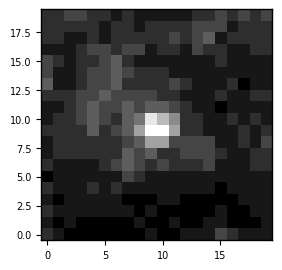

In [73]:
fovsize = 1200
fovx = 19
fovy = 13

xmin = fovsize*fovx
xmax = xmin + fovsize
ymin = fovsize*fovy
ymax = ymin + fovsize

neuron_xmin = 270
neuron_xmax = 910
neuron_ymin = 298
neuron_ymax = 882

plt.imshow(asyn_MIP_fast[xmin+neuron_xmin:xmax-neuron_xmax, ymin+neuron_ymin:ymax-neuron_ymax], origin="lower", cmap='gist_gray', vmax=20)

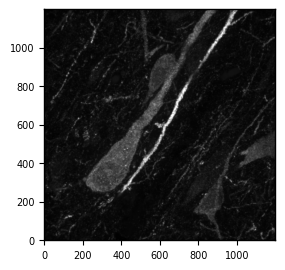

In [20]:
plt.imshow(cell_MIP_fast[xmin+neuron_xmin:xmax-neuron_xmax, ymin+neuron_ymin:ymax-neuron_ymax], origin="lower", cmap='gist_gray')

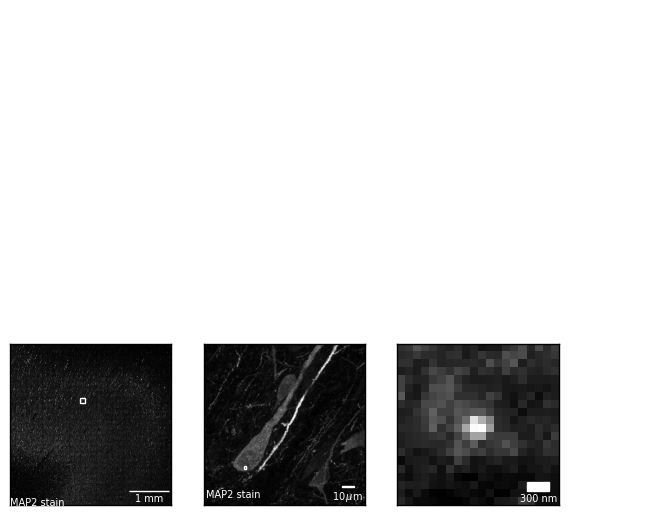

In [77]:
# HC patient plot
fig, axs = plots.two_column_plot(ncolumns=3, widthratio=[1,1,1])

fovsize = 1200
fovx = 19
fovy = 13

xmin = fovsize*fovx
xmax = xmin + fovsize
ymin = fovsize*fovy
ymax = ymin + fovsize

axs[0] = plots.image_plot(axs[0], raw_cell_MIP, scalebarsize=1000*1000, scalebarlabel='1 mm', cbar='off', label='MAP2 stain')

neuron_xmin = 0
neuron_xmax = 0
neuron_ymin = 0
neuron_ymax = 0

# Create a Rectangle patch
xsize, ysize = cell_MIP_fast[xmin+neuron_xmin:xmax-neuron_xmax, ymin+neuron_ymin:ymax-neuron_ymax].shape
recty = (ymin+neuron_ymin)
rectx = (xmin+neuron_xmin)
rect = patches.Rectangle((recty, rectx), xsize, ysize, linewidth=1, edgecolor='white', facecolor='none')

# Add the patch to the Axes
axs[0].add_patch(rect)

axs[1] = plots.image_plot(axs[1], raw_cell_MIP[xmin+neuron_xmin:xmax-neuron_xmax, ymin+neuron_ymin:ymax-neuron_ymax], cbar='off', label='MAP2 stain')

oligomer_xmin = 270
oligomer_xmax = 910
oligomer_ymin = 298
oligomer_ymax = 882

axs[2] = plots.image_plot(axs[2], raw_asyn_MIP[xmin+oligomer_xmin:xmax-oligomer_xmax, ymin+oligomer_ymin:ymax-oligomer_ymax], cbar='off', scalebarlabel='300 nm', scalebarsize=300, label='pS129 asyn stain')

xsize, ysize = asyn_MIP_fast[xmin+oligomer_xmin:xmax-oligomer_xmax, ymin+oligomer_ymin:ymax-oligomer_ymax].shape
recty = (oligomer_ymin-neuron_ymin)
rectx = (oligomer_xmin-neuron_xmin)
rect = patches.Rectangle((recty, rectx), xsize, ysize, linewidth=1, edgecolor='white', facecolor='none')
# Add the patch to the Axes
axs[1].add_patch(rect)


plt.savefig('HC_Patient_forMC.svg', dpi=600, format='svg')
plt.show()